# Multidimensionality

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Normal distributed points on 2D plane

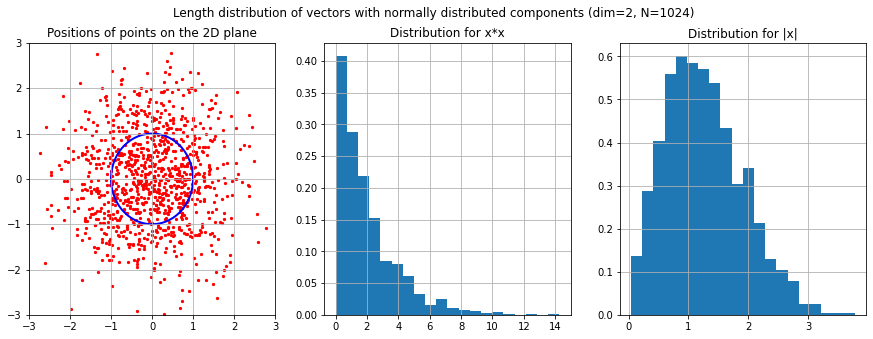

In [13]:
#import seaborn as sns; sns.set() 

X = np.random.normal(0,1, (1024, 2))

R = (X*X).sum(axis=1)

plt.figure(figsize=(15,5), facecolor ='w')    
plt.suptitle('Length distribution of vectors with normally distributed components (dim=2, N=1024)')
ax = plt.subplot(1,3,1)
plt.title(f"Positions of points on the 2D plane")
plt.grid()
ax.set_xlim(-3, 3); ax.set_ylim(-3, 3);
ax.add_patch(plt.Circle((0., 0.), 1., color='b', fill=False, linewidth=2))
plt.scatter(X[:,0], X[:,1], s=5, color="r")    

ax = plt.subplot(1,3,2)
plt.title(f"Distribution for x*x")
plt.grid()
plt.hist(R, 20, density=True)

ax = plt.subplot(1,3,3)
plt.title(f"Distribution for |x|")
plt.grid()
plt.hist(R**0.5, 20, density=True)
plt.show()

## Normal distributed points on 3D

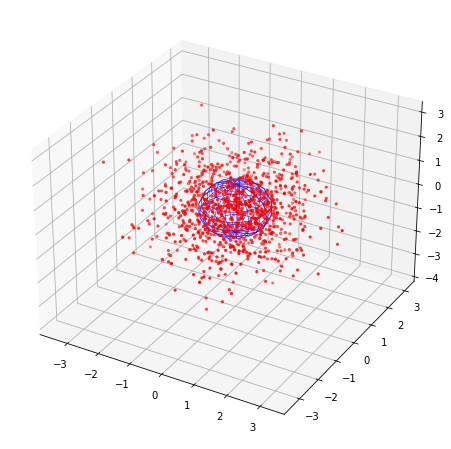

In [14]:
X = np.random.normal(0,1, (1000, 3))
fig = plt.figure (figsize=(8, 8), facecolor ='w')       
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=5, color='r')        

u, v = np.mgrid[0: 2*np.pi: 20j, 0:np.pi:10j]
x, y, z = np.cos(u)*np.sin(v), np.sin(u)*np.sin(v), np.cos(v) 
ax.plot_wireframe(x, y, z, color="b", linewidth=0.5)

plt.show()                                                  

## Length distribution of vectors with normally distributed components

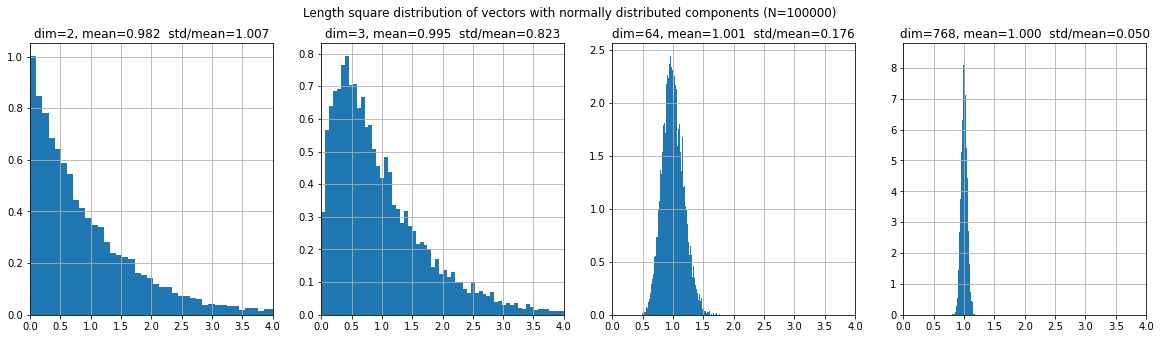

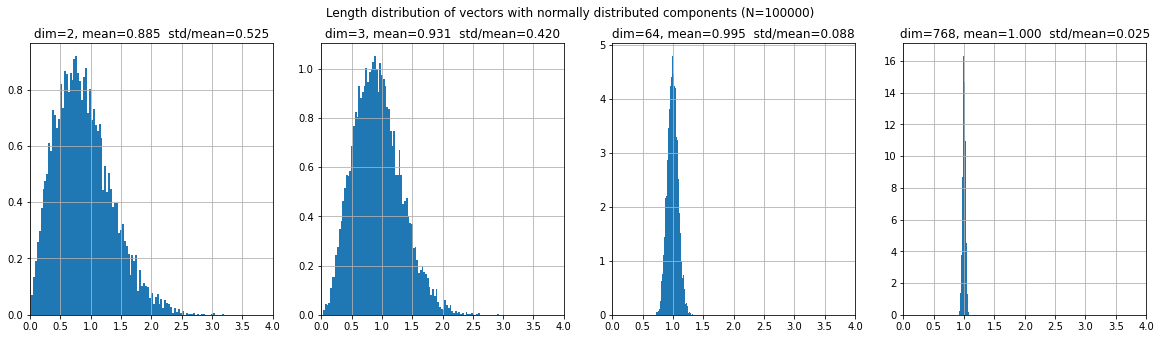

In [3]:
dims = [2,3,64,768]

for k in range(2):
    plt.figure(figsize=(20,5), facecolor ='w')    
    plt.suptitle(f'{"Length" if k==1 else "Length square":s} distribution of vectors with normally distributed components (N=100000)')
    for i,dim in enumerate(dims):
        X = np.random.normal(0,1, (10000, dim))/dim**0.5
        
        R = (X*X).sum(axis=1)
        if k == 1:
            R = R**0.5
        ax = plt.subplot(1,len(dims), i+1)
        plt.grid()
        plt.title(f"dim={dim}, mean={R.mean():.3f}  std/mean={R.std()/R.mean():.3f}")
        ax.set_xlim(0, 4)
        plt.hist(R, 100, density=True)
    plt.show()    

## Angle distribution

(2096128,) cos std: 0.03607391189776897 0.036084391824351615


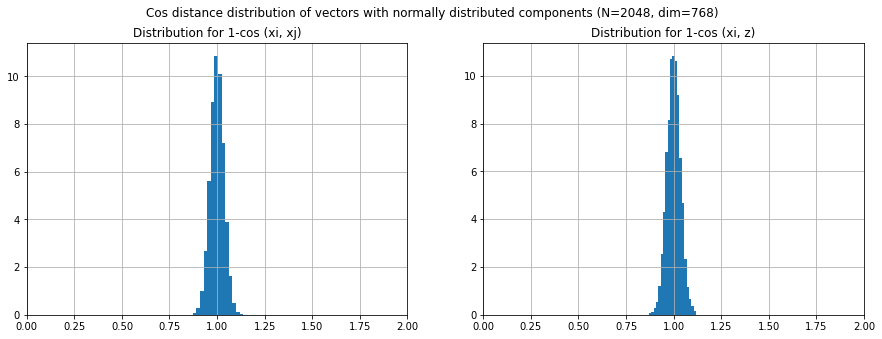

In [28]:
N, dim = 2048, 768
X = np.random.normal(0,1, (N, dim))
Z = np.zeros(dim)
Z[0] = 1

X /= np.linalg.norm(X, axis=1, keepdims=True) 

cos   = [ 1 - X[i] @ X[j]          for i in range(len(X)) for j in range(i+1, len(X))]

cos   = np.array(cos)
print(cos.shape, "cos std:", cos.std(), 1/X.shape[1]**0.5)

plt.figure(figsize=(15,5), facecolor ='w')    
plt.suptitle(f'Cos distance distribution of vectors with normally distributed components (N={N}, dim={dim})')
ax = plt.subplot(1,2,1)
ax.set_xlim(0, 2)
plt.title(f"Distribution for 1-cos (xi, xj)")
plt.grid()
plt.hist(cos, 20, density=True)
ax = plt.subplot(1,2,2)
plt.title(f"Distribution for 1-cos (xi, z)")
plt.hist(1-(X*Z).sum(axis=1), 20, density=True)
ax.set_xlim(0, 2)
plt.grid()
plt.show()


## Elbow Method for optimal value of k in KMeans

**Inertia**: It is the sum of squared distances of samples to their closest cluster center.

  99:  1914.873 

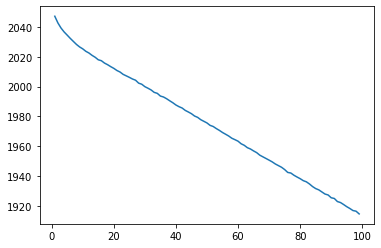

In [29]:
from sklearn.cluster import KMeans

elbow = []
for k in range(1,100):    
    km = KMeans(n_clusters=k)
    km.fit(X)
    elbow.append(km.inertia_)
    print(f"\r{k:4d}:  {km.inertia_:.3f}", end=" ")

plt.plot(np.arange(1,len(elbow)+1), np.array(elbow))
plt.show()

In [38]:
import math
import scipy

n = 64
print( math.pi**(n/2)/scipy.math.factorial(n/2)    )


3.0805210382670905e-20


## PCA

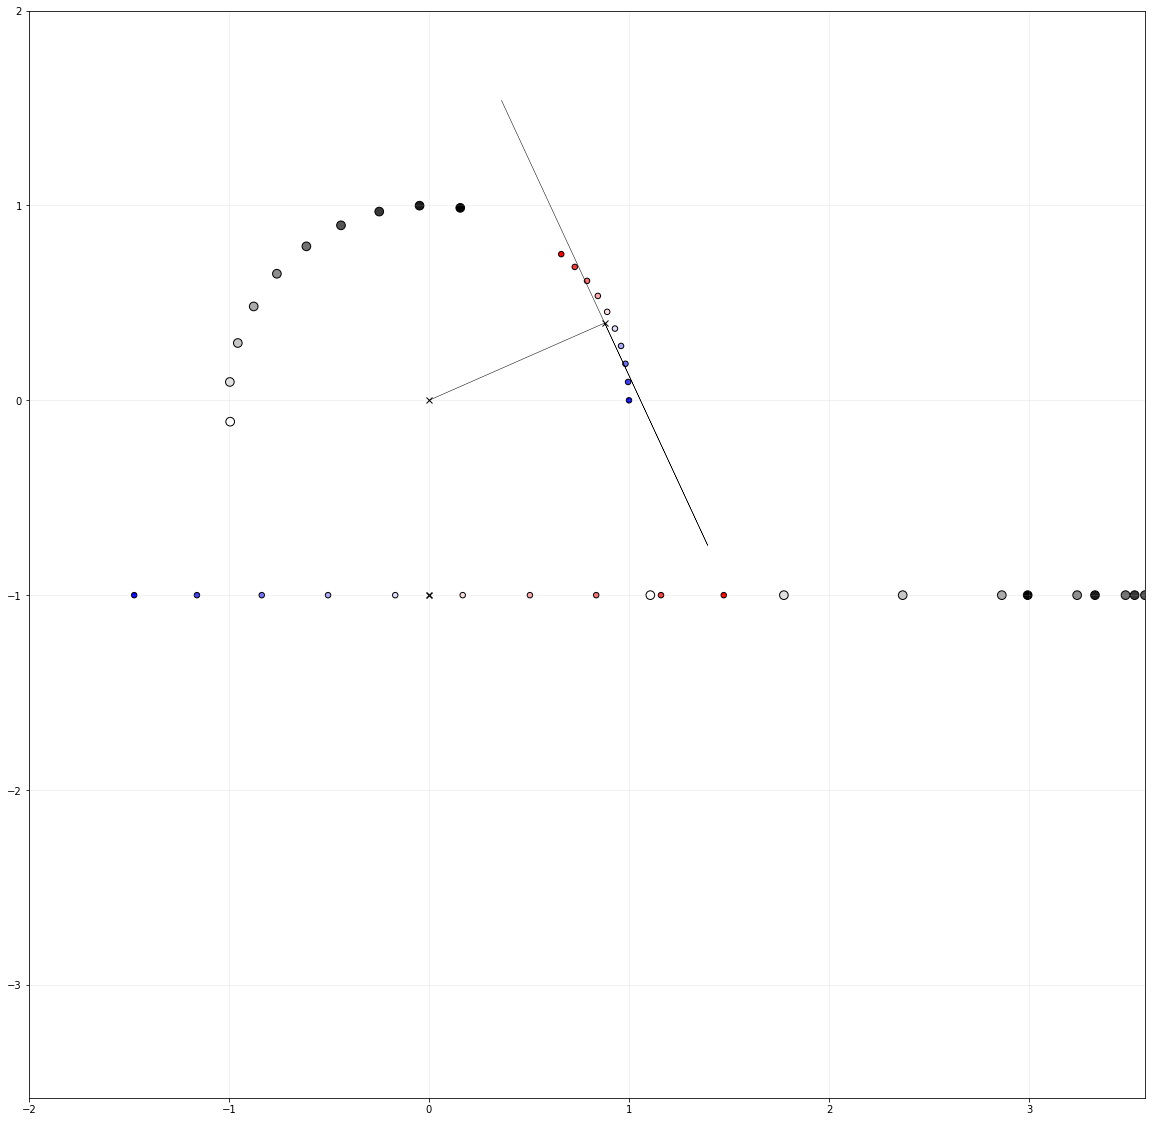

[0.98580551]


In [97]:
from sklearn.decomposition import PCA

vecs = np.zeros((10, 2))
for i in range(len(vecs)):
    vecs[i,0] = np.cos(0.3*np.pi*i/len(vecs))
    vecs[i,1] = np.sin(0.3*np.pi*i/len(vecs))

tst = np.zeros((10, 2))
for i in range(len(vecs)):
    tst[i,0] = np.cos(0.65*np.pi*i/len(tst)+ 1.8*np.pi/4)
    tst[i,1] = np.sin(0.65*np.pi*i/len(tst)+ 1.8*np.pi/4)
    
pca = PCA(n_components=1, whiten=True)  
pca.fit(vecs)
#print(pca.mean_)
#print(pca.components_)    
res1 = pca.transform(vecs)
res2 = pca.transform(tst)

mean  = pca.mean_
plane = np.array([mean[1], -mean[0]])

ma = max(tst.max(),-tst.min(), res1.max(),-res1.min(), res2.max(),-res2.min())
plt.figure(figsize=(20,20), facecolor ='w')     
plt.xlim(-2,ma); plt.ylim(-ma,2); plt.grid(alpha=0.2)
plt.scatter(vecs[:,0], vecs[:,1], c=np.arange(len(vecs)), cmap='bwr', s=30, edgecolors='k')    
plt.plot((0,mean[0]), (0, mean[1]), "-x", color="black", linewidth=0.5)    
plt.plot((mean[0],mean[0]+1.3*plane[0],mean[0]-1.3*plane[0]), (mean[1], mean[1]+1.3*plane[1],mean[1]-1.3*plane[1]), "-", color="black", linewidth=0.5)    
plt.scatter(0.0,-1., color="k", marker='x')    

plt.scatter(res1, np.full((len(res1),), -1),   c=np.arange(len(res1)),  cmap='bwr', s=30, edgecolors='k')    

plt.scatter(tst[:,0], tst[:,1], c=np.arange(len(res2)),  cmap='gray', s=75, edgecolors='k')    
plt.scatter(res2, np.full((len(res2),), -1), c=np.arange(len(res2)),  cmap='gray', s=75, edgecolors='k')    
plt.show()

print(pca.explained_variance_ratio_);


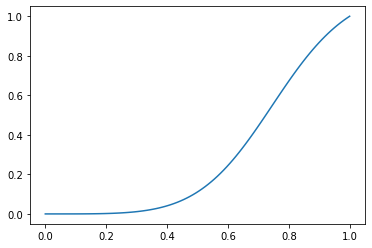

In [4]:
#f(x) = y**mu * log(x) + (1-y) *log(1-x)  => x = y
#     = (x-y)**2                             x = y

mu = 4
x = np.linspace(1, 0,  100)
y = x**mu/(x**mu+(1-x))

plt.plot(x,y);

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from   torch import nn

x = np.linspace(1, 0,  100)
y = torch.Tanh(x)
plt.plot(x,y);

AttributeError: module 'torch' has no attribute 'Tanh'